<h1>Análisis de datos de mineria Info.json</h1>

In [147]:
import pandas as pd
import numpy as np

In [148]:
df = pd.read_json('mineriaInfo.json')

In [149]:
df.head()

,codigo_dane,municipio_productor,departamento,recurso_natural,nombre_del_proyecto,a_o_produccion,trimestre,unidad_medida,tipo_contraprestacion,valor_contraprestacion,cantidad_producci_n
0,5001,Medellin,Antioquia,ARCILLA,PRODUCTORES,2018,Trimestre 4,TONELADAS,REGALIA,614258.0,0.0
1,5001,Medellin,Antioquia,ARCILLAS CERAMICAS,PRODUCTORES,2014,Trimestre 4,TONELADAS,REGALIA,2036781.0,14381.0
2,5001,Medellin,Antioquia,ARCILLAS FERRUGINOSAS,PRODUCTORES,2012,Trimestre 1,TONELADAS,REGALIA,836927.0,16308.0
3,5001,Medellin,Antioquia,ARCILLAS MISCELANEAS,PRODUCTORES,2019,Trimestre 1,TONELADAS,REGALIA,5763839.0,33348.0
4,5001,Medellin,Antioquia,ARCILLAS MISCELANEAS,PRODUCTORES,2019,Trimestre 2,TONELADAS,REGALIA,5802546.0,32485.0


In [150]:
df.shape

(45215, 11)

In [151]:
df.dtypes

codigo_dane                 int64
municipio_productor        object
departamento               object
recurso_natural            object
nombre_del_proyecto        object
a_o_produccion              int64
trimestre                  object
unidad_medida              object
tipo_contraprestacion      object
valor_contraprestacion    float64
cantidad_producci_n       float64
dtype: object

In [152]:
df.describe()

,codigo_dane,a_o_produccion,valor_contraprestacion,cantidad_producci_n
count,45215.000000,45215.000000,4.515500e+04,4.521400e+04
mean,32192.671392,2016.110384,3.829653e+08,6.450541e+04
std,23941.334350,2.617226,2.812314e+09,5.967901e+05
min,5001.000000,2012.000000,0.000000e+00,0.000000e+00
25%,15403.000000,2014.000000,1.620040e+05,5.550000e+02
50%,25260.000000,2016.000000,1.489218e+06,3.433000e+03
75%,52079.000000,2018.000000,1.640020e+07,1.934100e+04
max,99773.000000,2021.000000,1.554652e+11,2.672629e+07


In [153]:
df.dtypes

codigo_dane                 int64
municipio_productor        object
departamento               object
recurso_natural            object
nombre_del_proyecto        object
a_o_produccion              int64
trimestre                  object
unidad_medida              object
tipo_contraprestacion      object
valor_contraprestacion    float64
cantidad_producci_n       float64
dtype: object

In [154]:
df.isnull().mean()

codigo_dane               0.000000
municipio_productor       0.000000
departamento              0.000000
recurso_natural           0.000000
nombre_del_proyecto       0.000000
a_o_produccion            0.000000
trimestre                 0.000000
unidad_medida             0.000000
tipo_contraprestacion     0.000000
valor_contraprestacion    0.001327
cantidad_producci_n       0.000022
dtype: float64

In [155]:
df = df.dropna(how='any', axis=0)

In [156]:
df.recurso_natural.value_counts()

ORO                                         9331
PLATA                                       6382
CARBON                                      4719
GRAVAS                                      4364
ARENAS                                      3519
                                            ... 
SERPENTINA (BLOQUE MAYOR O IGUAL A 1 M3)       3
CARBONATO DE CALCIO                            2
GRAFITO                                        2
GRANITO (BLOQUE MAYOR O IGUAL A 1 M3)          1
ASBESTO                                        1
Name: recurso_natural, Length: 70, dtype: int64

In [157]:
df.unidad_medida.value_counts()

GRAMOS            17301
METROS CUBICOS    16173
TONELADAS         10688
QUILATES            730
LIBRAS              182
KILOGRAMOS           80
Name: unidad_medida, dtype: int64

In [158]:
df = df[df['unidad_medida'].str.fullmatch('GRAMOS')]

In [159]:
df.unidad_medida.value_counts()

GRAMOS    17301
Name: unidad_medida, dtype: int64

In [160]:
df.recurso_natural.value_counts()

ORO        9331
PLATA      6382
PLATINO    1588
Name: recurso_natural, dtype: int64

In [161]:
df.shape

(17301, 11)

In [162]:
df= df[['municipio_productor', 'a_o_produccion', 'valor_contraprestacion', 'cantidad_producci_n', 'unidad_medida', 'codigo_dane']].groupby(['municipio_productor', 'a_o_produccion', 'unidad_medida', 'codigo_dane']).sum().reset_index()

In [163]:
df['mineria_key'] = range(1, len(df) + 1)

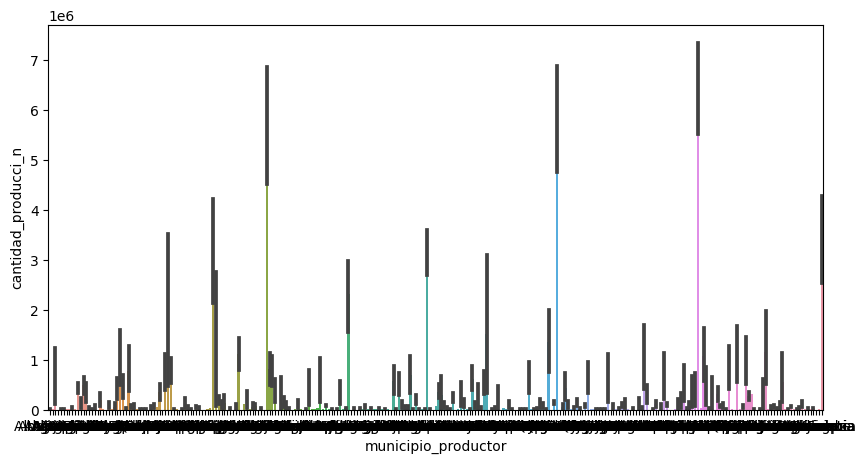

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='municipio_productor', y='cantidad_producci_n', data=df)
plt.show()

In [166]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
  
# apply normalization techniques
column = 'cantidad_producci_n'
df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))

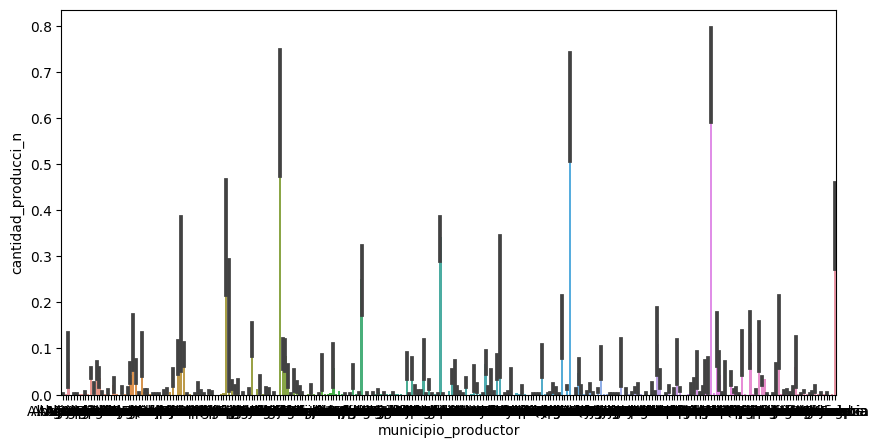

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='municipio_productor', y='cantidad_producci_n', data=df)
plt.show()

In [168]:
df.to_csv('Datos/mineriaInfo_limpio.csv', index=False, decimal='.', sep=';')